In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("players_stats.csv")
df = df.drop_duplicates()
df = df.dropna()

print(df.head())


            Name  Games Played   MIN   PTS  FGM  FGA   FG%  3PM  3PA   3P%  \
0       AJ Price            26   324   133   51  137  37.2   15   57  26.3   
1   Aaron Brooks            82  1885   954  344  817  42.1  121  313  38.7   
2   Aaron Gordon            47   797   243   93  208  44.7   13   48  27.1   
3  Adreian Payne            32   740   213   91  220  41.4    1    9  11.1   
4     Al Horford            76  2318  1156  519  965  53.8   11   36  30.6   

     ...       Age  Birth_Place  Birthdate                    Collage  \
0    ...      29.0           us   7-Oct-86  University of Connecticut   
1    ...      30.0           us  14-Jan-85       University of Oregon   
2    ...      20.0           us  16-Sep-95      University of Arizona   
3    ...      24.0           us  19-Feb-91  Michigan State University   
4    ...      29.0           do   3-Jun-86      University of Florida   

   Experience  Height  Pos  Team  Weight        BMI  
0           5   185.0   PG   PHO   81.

## Part One

For part one of this assignment, I chose the variable "BMI", from the above dataset.

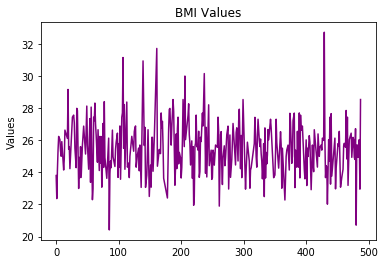

In [71]:
plt.plot(df['BMI'], color='purple')
plt.ylabel('Values')
plt.title('BMI Values')
plt.show()




This is a basic line plot of the variable "BMI in our dataset.  It doesn't really tell us anything other than the fact that the BMI values of the players in the NBA is not consistent from one player to the other.  The values are all over the place.

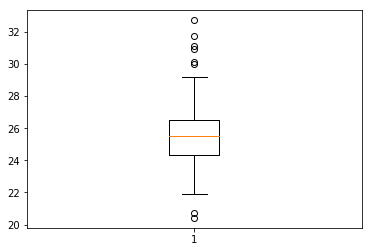

In [72]:
df_bmi = df['BMI']

plt.boxplot(df_bmi)
plt.show()

This box plot made using seaborn provides alittle more detail.  Not only does it show the mean, and the percentiles, it also shows us any outliers in our data.

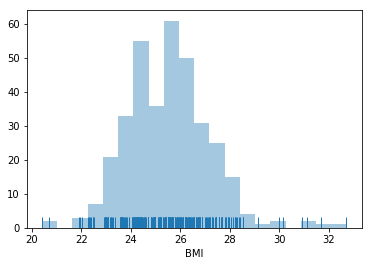

In [73]:
sns_hist = sns.distplot(df['BMI'], bins=20, kde=False, rug=True)
plt.show()

This histogram shows us the overall distribution of the BMI values from our dataset.

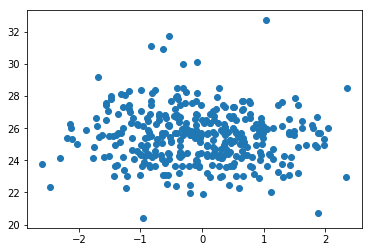

In [74]:
df_qq = df['BMI']
norm = np.random.normal(0, 1, 350)
norm.sort()
plt.plot(norm, df_qq, "o") 
plt.show() 

This QQ plot shows that the data in the 'BMI' column of our dataset is not normally distributed.  This may suggest alot of variance in the BMI data.

## Part Two

For part two of this assignment, I chose the two continuous variables of height and weight.

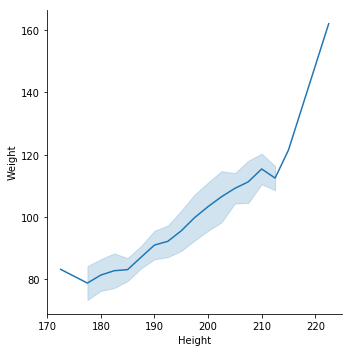

In [75]:
sns.relplot(x="Height", y="Weight", kind="line", ci="sd", data=df)
plt.show()

This line graph shows that there is a positive correalation between height and weight.

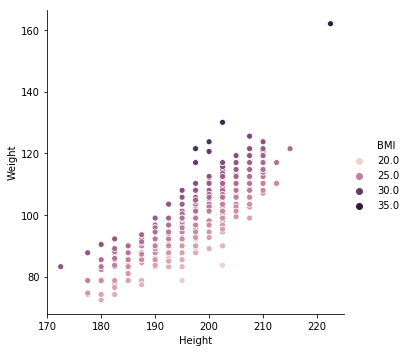

In [76]:
sns.relplot(x="Height", y="Weight", hue="BMI", data=df)
plt.show()

This scatter plot also shows the positive correlation between weight and height in our dataset, but this scatter plot does a better job of showing the variation in our data.

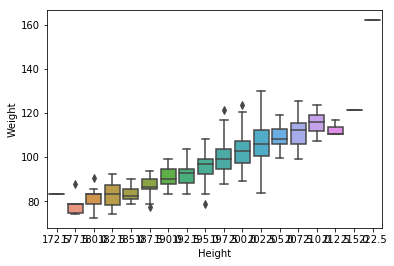

In [77]:
sns.boxplot(x='Height', y='Weight', data=df)
plt.show()

This box plot shows us the three quartiles of our distribution, and the outliers.  It gives us a better picture of how the weights of the athletes are spread out for each height level.

## Part Three

For the third part of this assignment, I used the categorical variable "Pos", which represents the different positiions played by the athletes in the NBA.  For the continuous variable, I used "BMI"


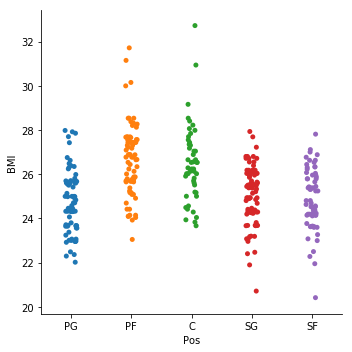

In [78]:
sns.catplot(x="Pos", y="BMI", data=df)
plt.show()

This scatter plot made using seaborn, shows the spread of the data in each category.  It gives us an overall picture of how similar, or different, the categories are, when accouting for our continuous variable on the y axis.  But ths scatter plot doesn't provide valuable information of the data distribution within each category.

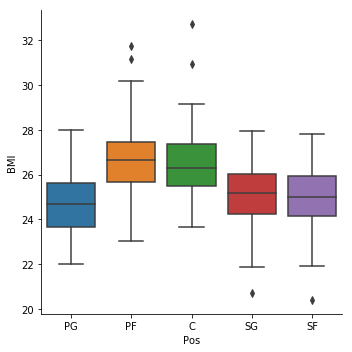

In [79]:
sns.catplot(x="Pos", y="BMI", kind="box", data=df)
plt.show()

This boxplot is better than the scatter plot in showing the distribution of the data within each category.  It shows the three quartiles of the distribution along with the outliers.

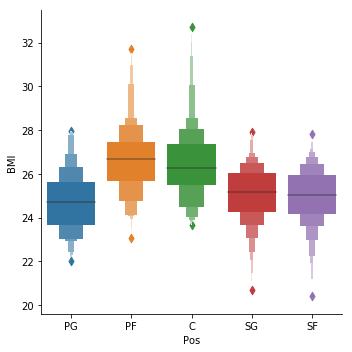

In [80]:
sns.catplot(x="Pos", y="BMI", kind="boxen", data=df)

This variation of the box plot, called a boxen plot, adds to the benefits of the box plot by giving us a better picture of the shape of the distribution.


C:\Users\PV-R68G\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


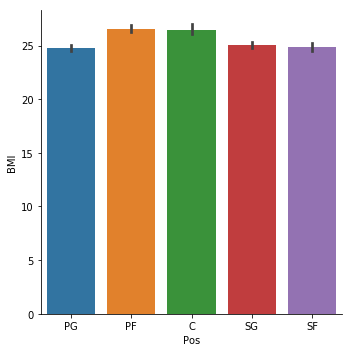

In [85]:
sns.catplot(x="Pos", y="BMI", kind="bar", data=df)

This bar graph has the benefit of showing the central tendency or our data.  Here we are getting the mean (average) of each category.  We can verify this by actually counting the mean of one of the categories and comparing it to our graph.  We calculated the mean of the C position (below) to be 26.49.  This is the same as what our graph shows us.  Although this kind of graph makes it easier to see the central tendency of the categories, its a horrible way to see how the data is varied within each category.

In [89]:
cdf = df[df["Pos"] == 'C']
print(cdf['BMI'].mean())

26.4892257255102


C:\Users\PV-R68G\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


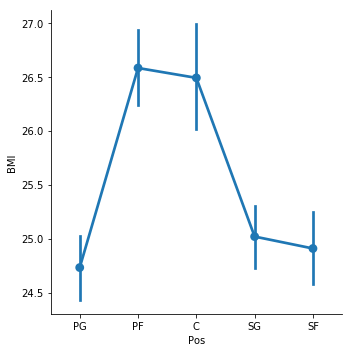

In [86]:
sns.catplot(x="Pos", y="BMI", kind="point", data=df)

This point plot gives the same information as the bar graph above, but rather than a bar, it plots a point to show the value of the central tendency (in this case the mean or average), along with the confidence interval.  This method of visualizing the data makes it easier to understand how the central tendency is changing from one category to another.

C:\Users\PV-R68G\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


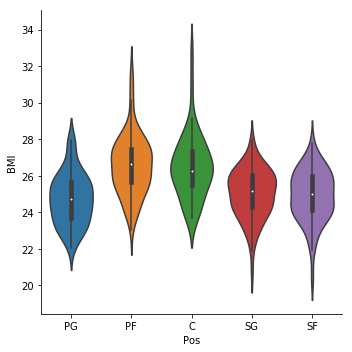

In [91]:
sns.catplot(x="Pos", y="BMI", kind="violin", data=df)

This approach uses the kernel density estimate to give a better description of the distribution of values.